In [1]:
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Now we will import data set

In [2]:
happy = pd.read_csv("Happy.csv")

In [3]:
happy


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [4]:
happy.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [5]:
happy.dtypes

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object

In [6]:
happy.isnull().values.any()

False

// We can see that all values in the data set are real (no NaN values are present in the data set)

In [7]:
happy.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

Can see columns clearly to do data cleaning easily down the line

In [8]:
happy[happy['Country'] == 'Zimbabwe']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
143,144,Zimbabwe,2.995,3.11,2.88,0.548,0.947,0.69,0.27,0.329,0.106,0.105


When randomly selecting a country like Zimbabwe we can see its relevant details

We will find the top 10 countries for happiness

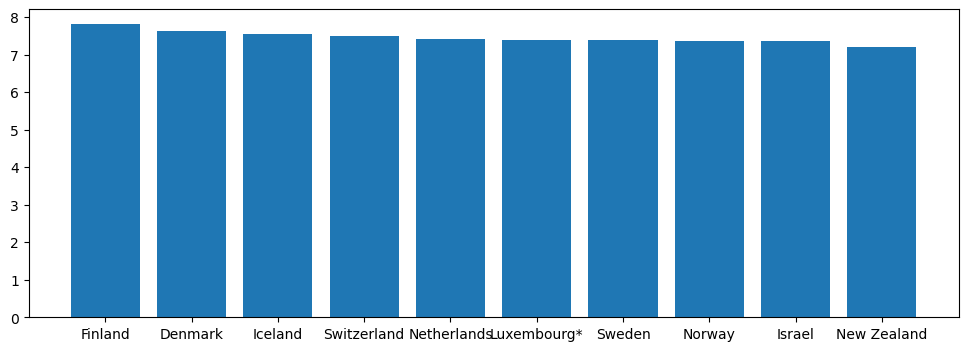

In [9]:
fig = plt.figure(figsize =(12,4))
x= happy['Country']
y=happy['Happiness score']

plt.bar(x[0:10],y[0:10])

plt.show()

We will repeat this for two other factors such as Dystopia and Life Expectancy


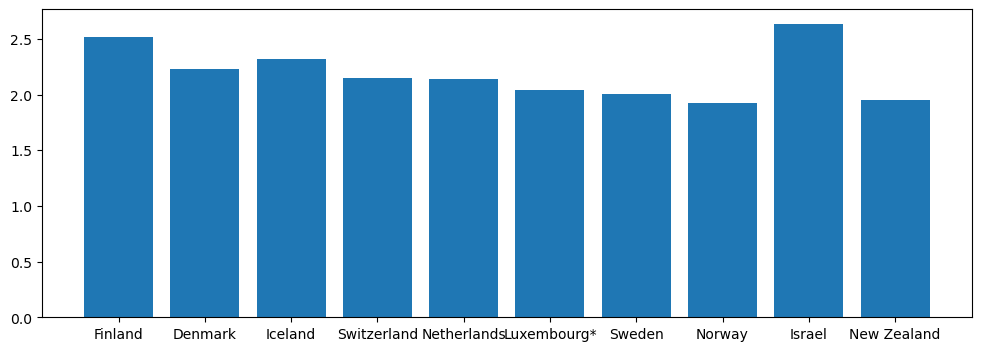

In [10]:
fig = plt.figure(figsize =(12,4))
x= happy['Country']
y=happy['Dystopia (1.83) + residual']

plt.bar(x[0:10],y[0:10])

plt.show()

Isreal is an anomaly but we can see that there is a general trend of how dystopia affects the happiness in a country. Finland is ranked 1 in the world for happiness and has lower dystopia (the higher the number away from 0) compared to countries behind it such as denmark, iceland etc..


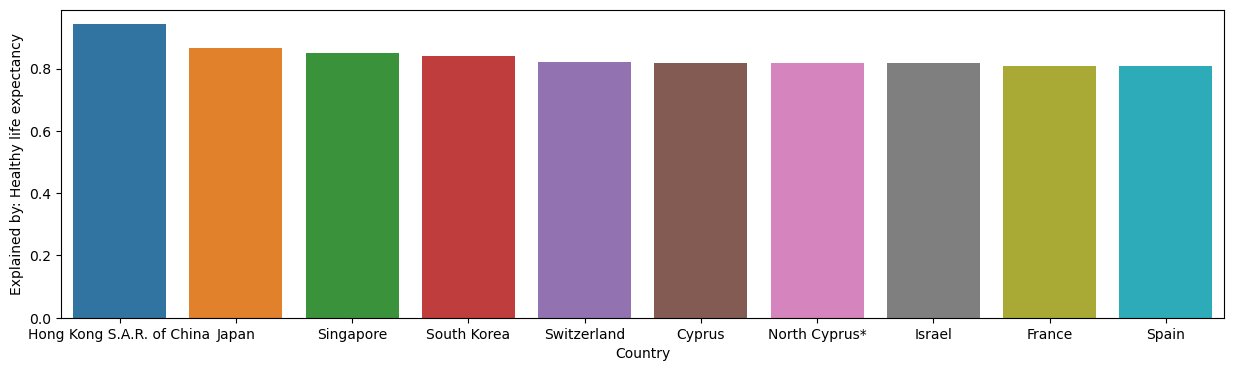

In [11]:
plt.figure(figsize=(15,4))
sns.barplot(x='Country', 
            y='Explained by: Healthy life expectancy',
            data=happy.nlargest(10,'Explained by: Healthy life expectancy'))

plt.show()

We an see from this bar plot, we may think that by living longer we would then lead a happier life. But according to statistics we can see Finland to New Zealand are the top 10 countries who are happiest but only 2/10 of them made it to the top 10 countries with the highest life expectancy.

In [12]:
happynew=happy.drop(['Whisker-high', 'Whisker-low', 'RANK', 'Country'], axis=1)

We used the drop function to do data cleaning to further narrow down our search (such as RANK which is not significant) to more relevant factors that will potentially affect happiness in a country. 


<AxesSubplot:>

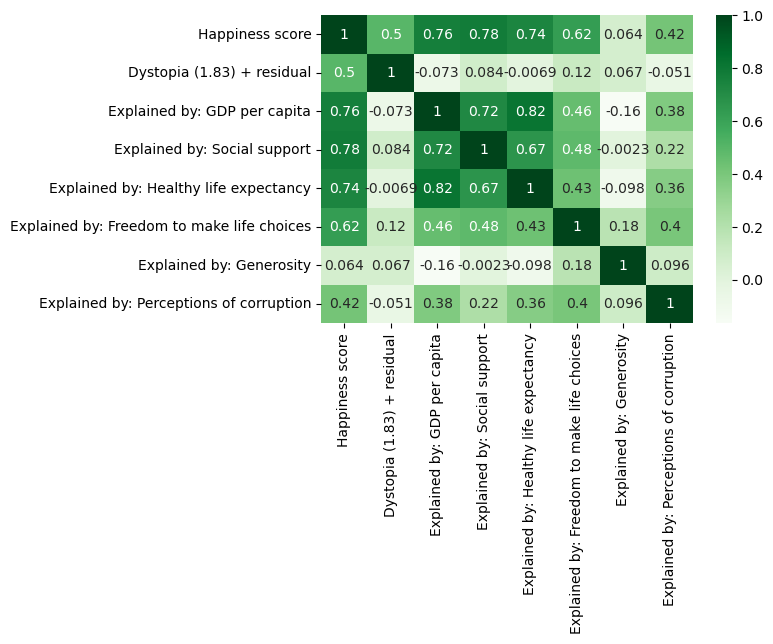

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(happynew.corr(),annot=True, cmap="Greens")

we can see from the heat map that the top two factors in influencing the Happiness score is 

1. Social support
2. GDP per capita


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select only the numerical columns from the intrusionog dataframe
num_cols = happy.select_dtypes(include=['float64', 'int64']).columns

# Use the scaler to standardize the numerical columns
scaled_data = scaler.fit_transform(happy[num_cols])

# Convert the scaled data back to a dataframe
scaled_df1 = pd.DataFrame(scaled_data, columns=num_cols)
scaled_df=scaled_df1.drop(['Happiness score'],axis=1)



In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Select only the categorical columns from the intrusionog dataframe
cat_cols = happy.select_dtypes(include=['object']).copy()

# Use the encoder to encode the categorical columns
encoded_data = cat_cols.apply(encoder.fit_transform)




scale variables so that it can worik well

In [16]:
happy_X = pd.concat([scaled_df,encoded_data],axis=1)
happy_y = happynew['Happiness score']
happy_X.shape

(146, 11)

In [17]:
happy_x=happy_X.drop(['Whisker-high', 'Whisker-low', 'RANK', 'Country'], axis=1)

In [18]:
happy_y.shape

(146,)

<AxesSubplot:xlabel='feature'>

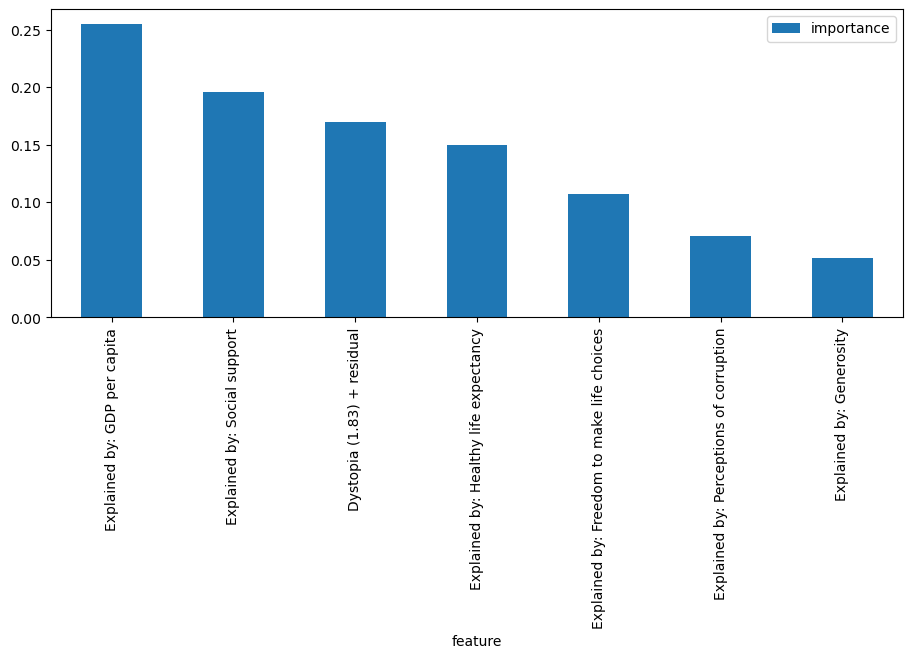

In [19]:
rfc = RandomForestClassifier()

# Check if happy_y is continuous and convert it to categorical if necessary
if happy_y.dtype == 'float64':
    happy_y = pd.cut(happy_y, bins=3, labels=['low', 'medium', 'high'])

# fit random forest classifier on the training set
rfc.fit(happy_x, happy_y)

# extract important features
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature':happy_x.columns, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')


# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [20]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(happy_x, happy_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), happy_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [21]:
selected_features

['Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(happy_x[selected_features],happy_y,train_size=0.80, random_state=2)

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = rf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


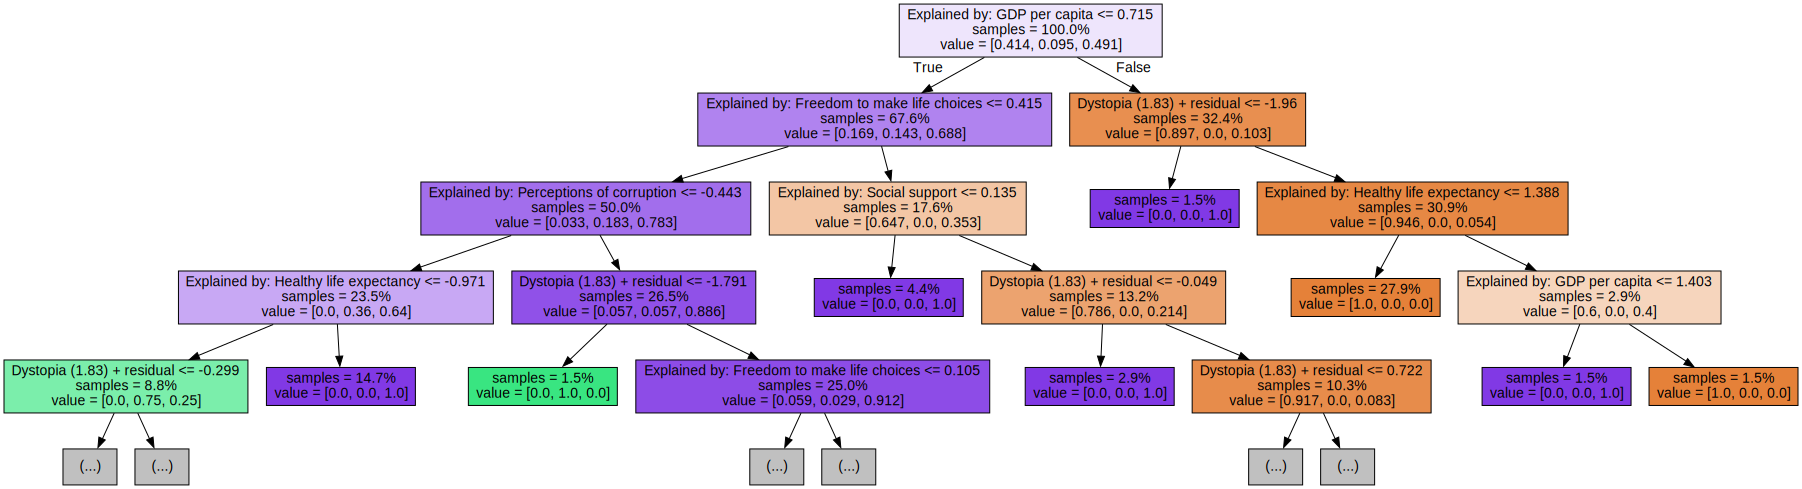

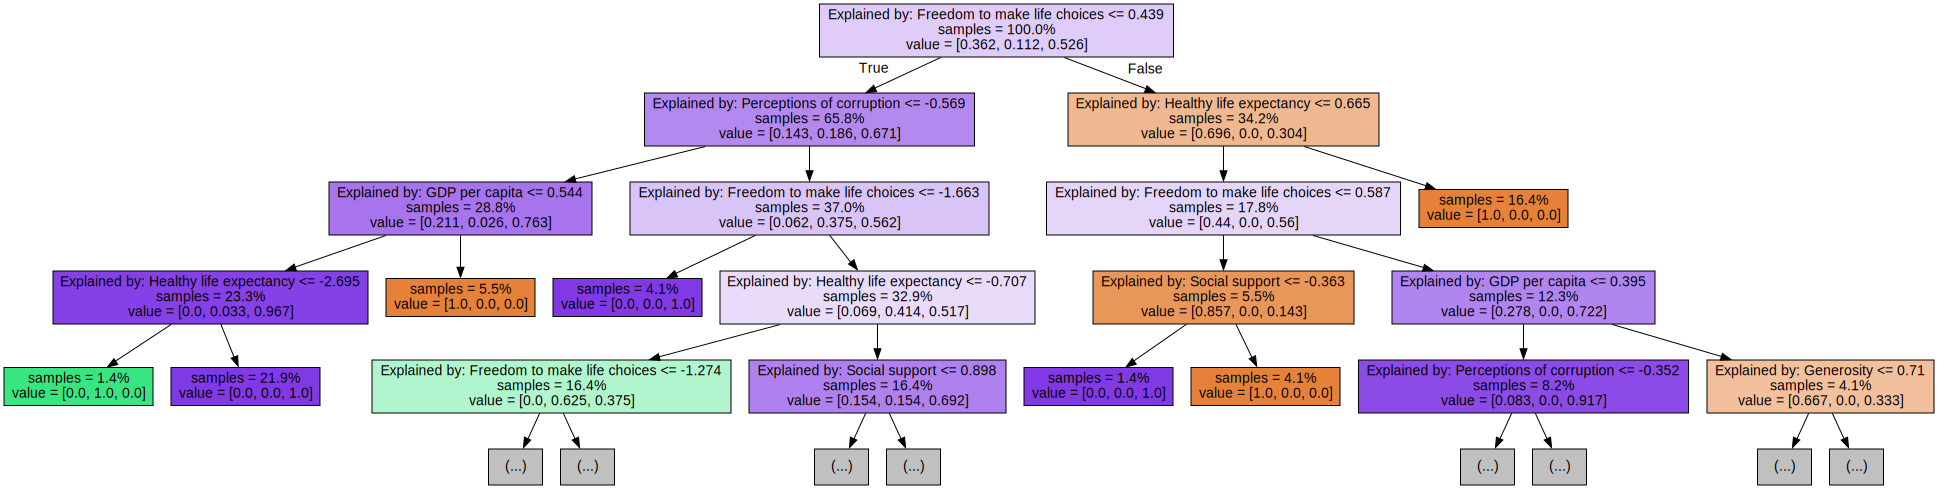

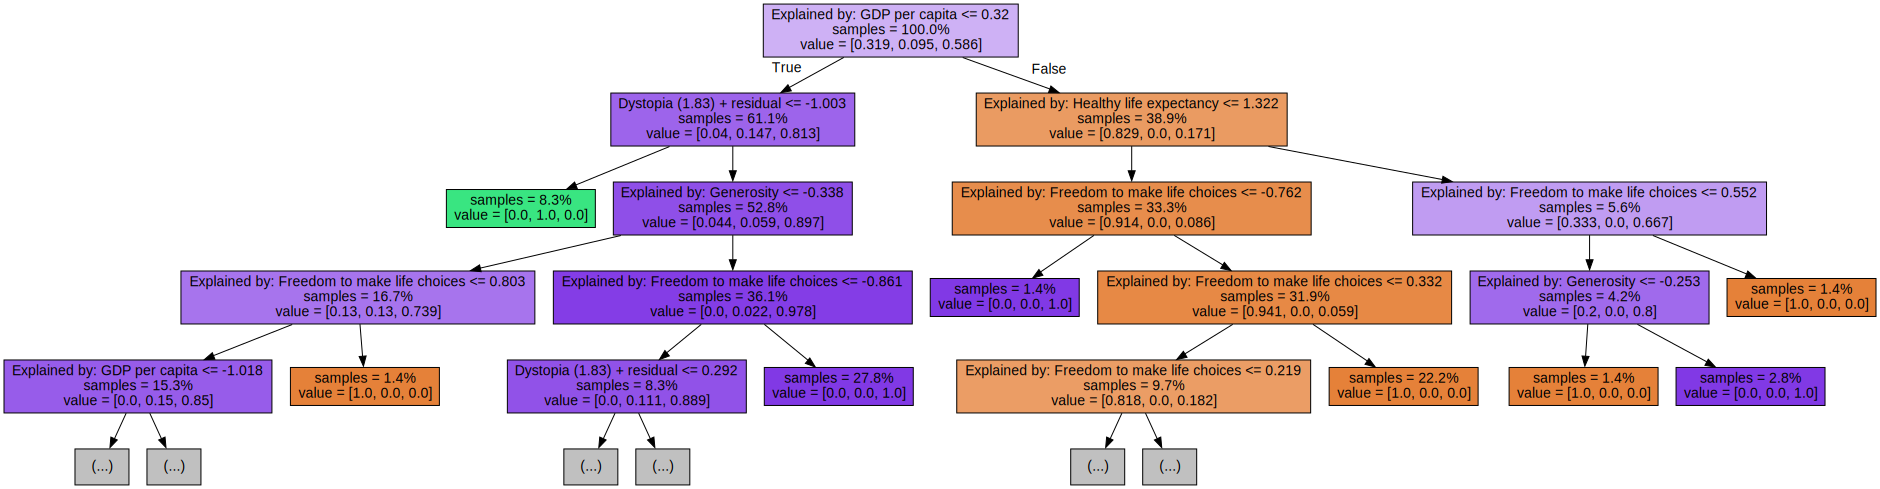

In [26]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=8, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot)
    display(graph)

In [27]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028E27724310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028E27317280>})

In [28]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 361}


We want to use Hierarchical clustering because it is the most powerful method to help us build tree structures from data similarities to help us better visualise the variables affecting happiness in a specific country.

In [29]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)
# we do this to define the clustering method

In [30]:
clust_labels1 = doAgglomerative(happynew, 3)
agglomerative = pd.DataFrame(clust_labels1)
happynew.insert((happynew.shape[1]),'agglomerative',agglomerative) # creating a columns for agglomerative

In [31]:
happynew.tail()

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,agglomerative
141,3.471,0.187,1.503,0.815,0.280,0.571,0.012,0.102,0
142,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544,0
143,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105,0
144,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034,0
145,2.404,1.263,0.758,0.000,0.289,0.000,0.089,0.005,0


In [32]:
happynew.columns

Index(['Happiness score', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'agglomerative'],
      dtype='object')

In [33]:
clusters = ['cluster0', 'cluster1', 'cluster2']
happynew['cluster_name'] = [clusters[label] for label in happynew['agglomerative']]


In [34]:
happynew.columns


Index(['Happiness score', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'agglomerative', 'cluster_name'],
      dtype='object')

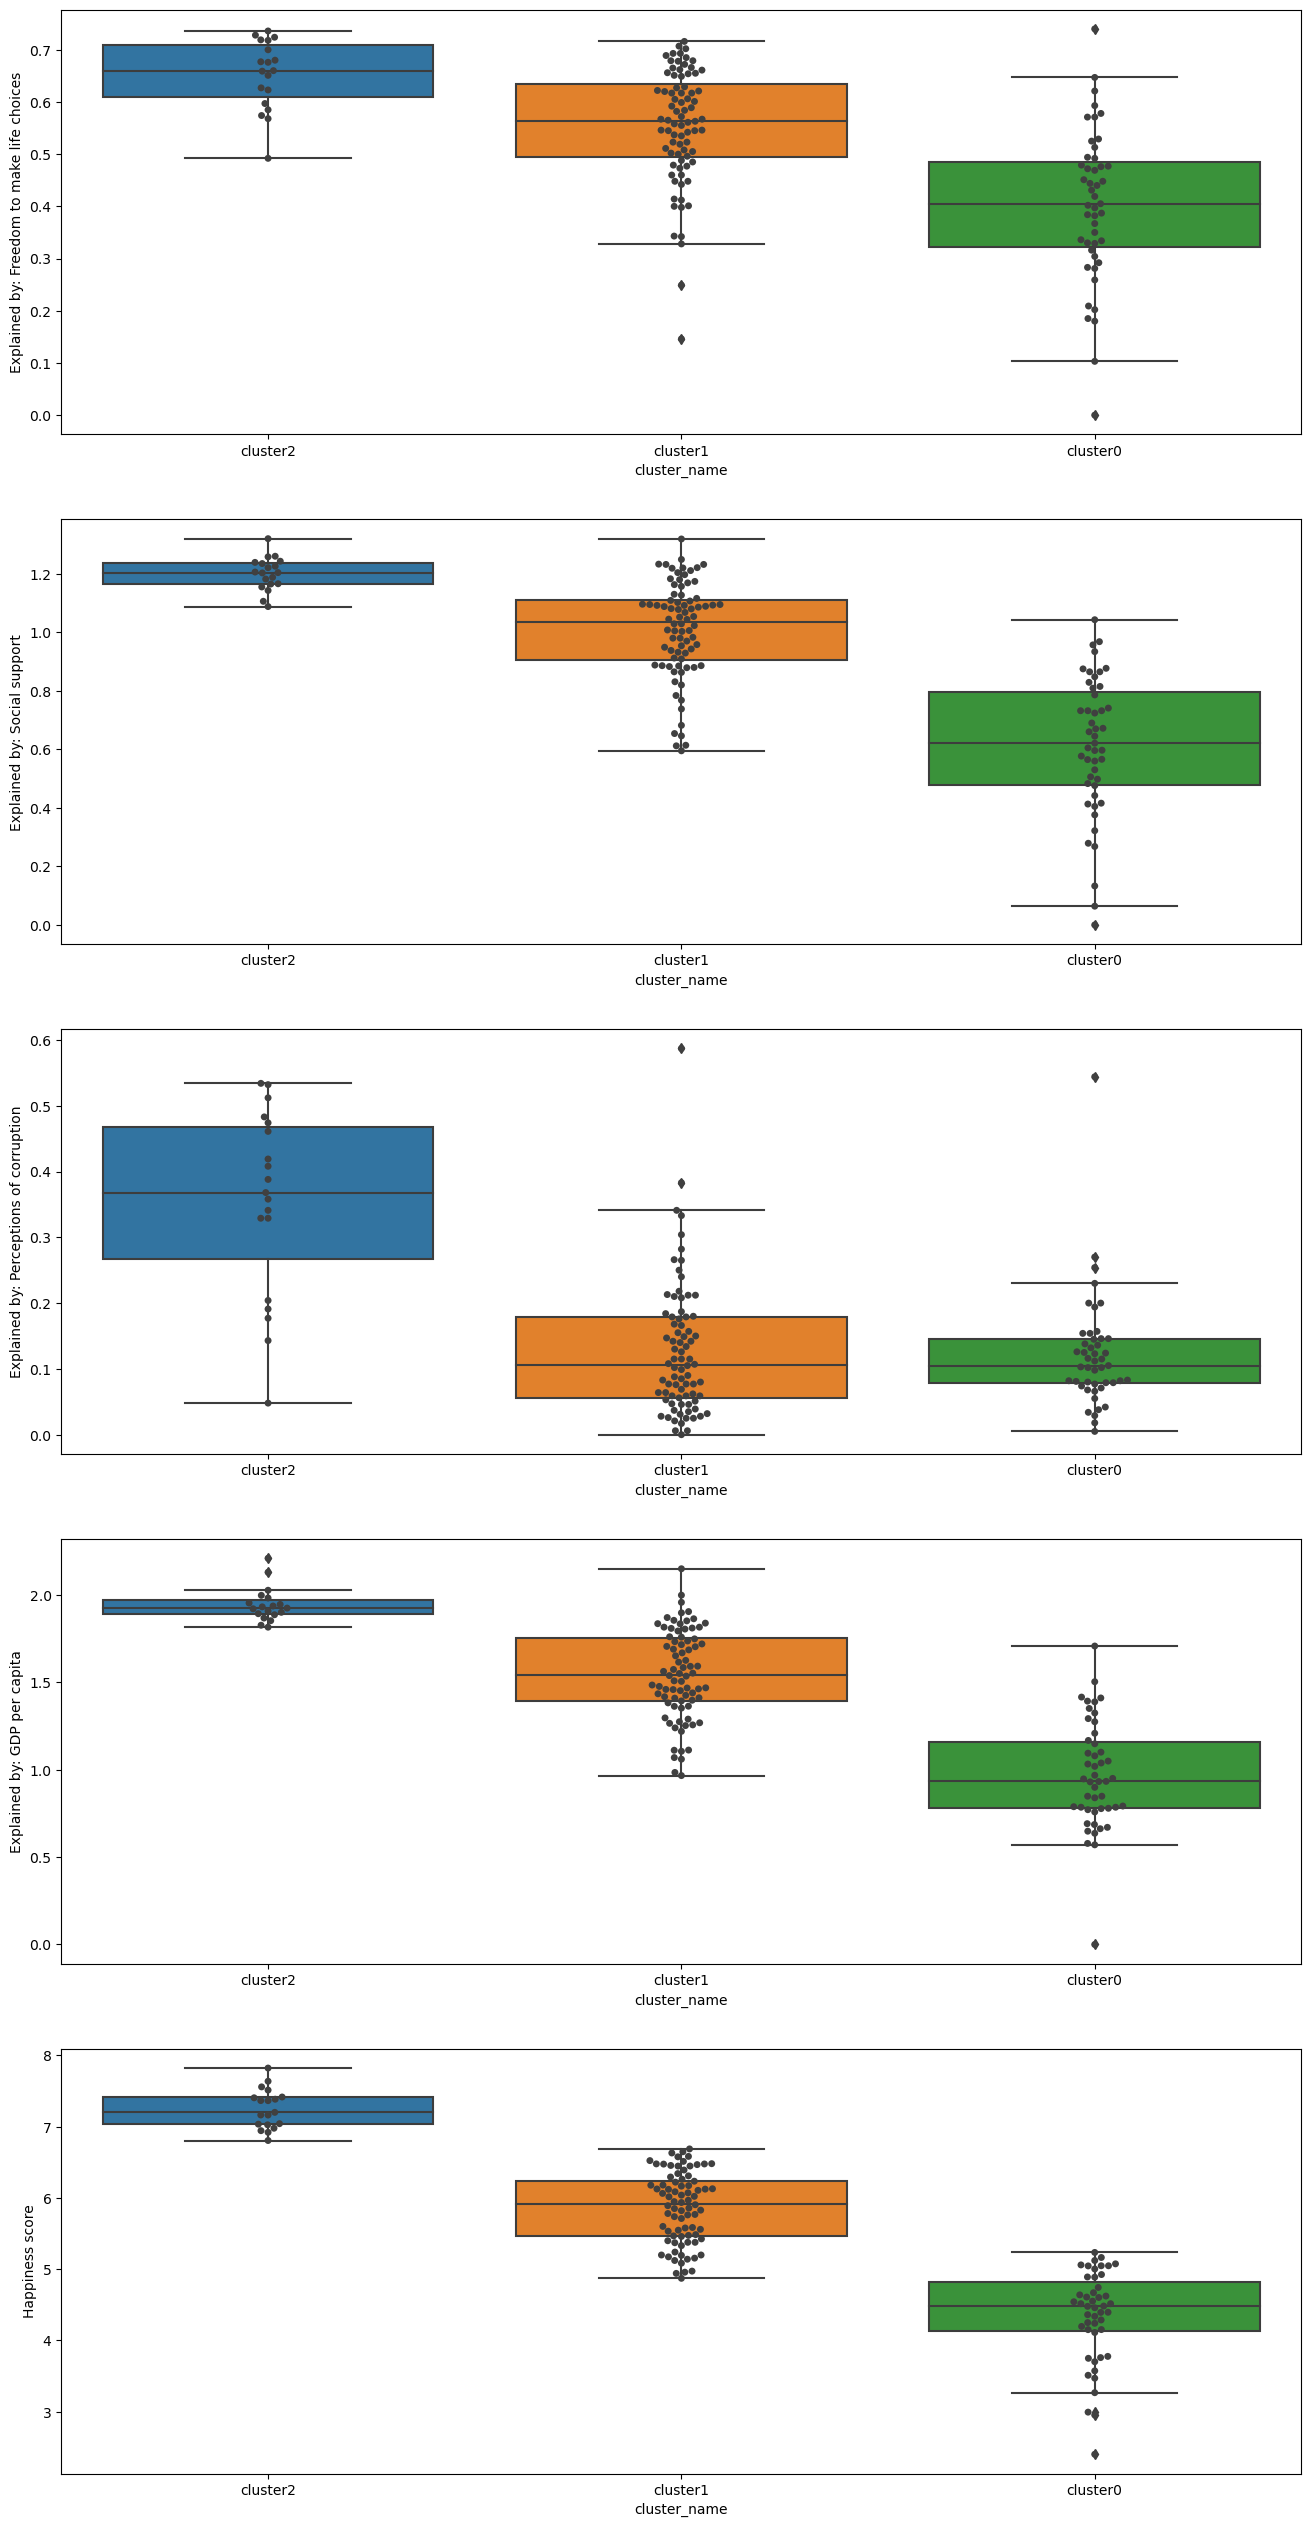

In [35]:

# Define a function to plot box and swarm plots for each feature
def plot_feature(ax, x, y, data):
    sns.boxplot(x=x, y=y, data=data, ax=ax)
    sns.swarmplot(x=x, y=y, data=data, color='0.25', ax=ax)
    happynew1 = happynew.drop(['Dystopia (1.83) + residual'], axis=1)

# Plotting Box Plots
fig, axs = plt.subplots(nrows=5, figsize=(16, 32))

features = ['Explained by: Freedom to make life choices', 'Explained by: Social support',
            'Explained by: Perceptions of corruption', 'Explained by: GDP per capita',
            'Happiness score']

for i, feature in enumerate(features):
    plot_feature(axs[i], 'cluster_name', feature, happynew)

plt.show()

Cluster 2 countries appear to have more freedom compared to Cluster 1 countries. Social support seems to be better in Cluster 2 than Cluster 1. Outliers in the box plot for Cluster 1 indicate lower family and social support. Both Cluster 1 and Cluster 2 have some countries with high corruption levels. GDP per capita decreases as we move from Cluster 2 to Cluster 1, suggesting weaker economies in Cluster 1. Citizens in Cluster 2 countries seem to be happier than others, but some countries in Cluster 1 have low happiness scores. Cluster 2 countries are either developed or developing, while Cluster 1 countries are underdeveloped.

In [36]:
datas = happynew.join(happy['Country'])

In [37]:
happynew1 = datas.set_index('agglomerative')

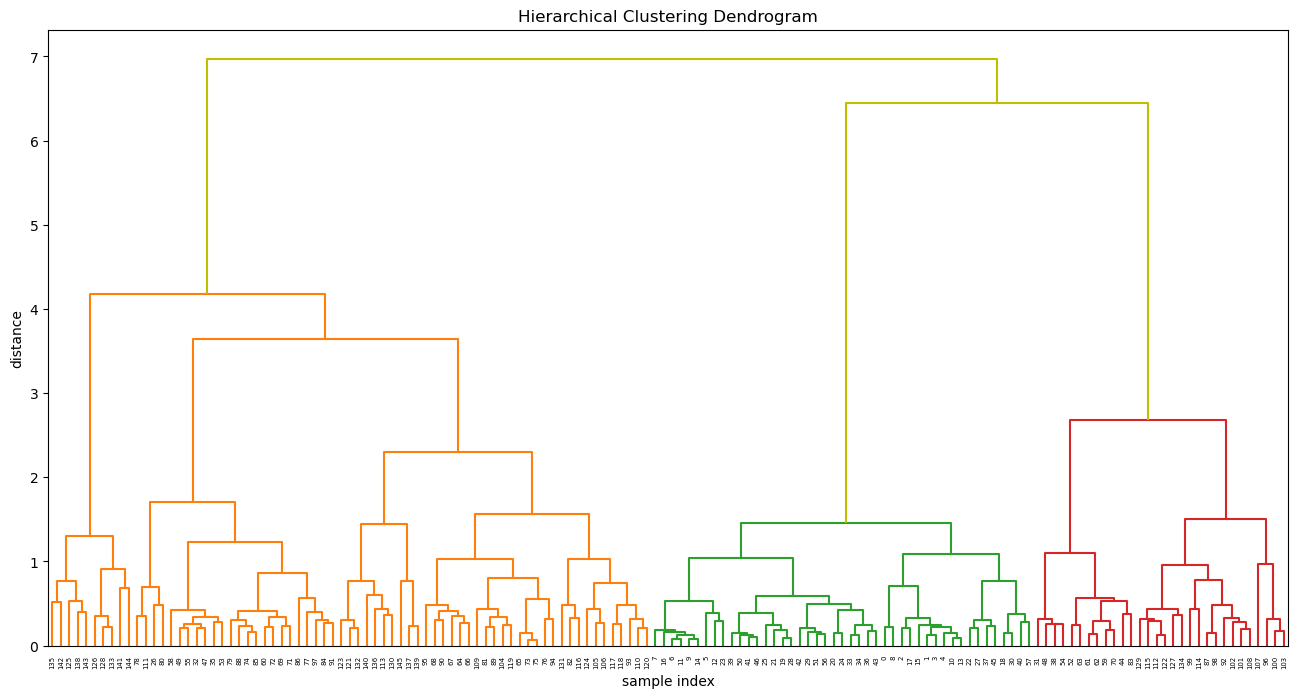

In [38]:
from scipy.cluster import hierarchy
# Perform hierarchical clustering
Z = hierarchy.linkage(datas.iloc[:, 1:7], method='ward')

# Set color palette
sns.set_palette(['m', 'c', 'y'])
    
# Create plot and dendrogram
fig, axes = plt.subplots(figsize=(16, 8))
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', 
                           orientation='top')

# Set plot properties
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

# Reset color palette
sns.reset_orig()

# Show plot
plt.show()

The dendrogram shows how the data points are clustered together based on their similarity. The height of each branch in the dendrogram represents the distance between the clusters that are being merged. 

The longer the branch, the less similar the clusters are. In this case, it seems that two clusters provide a better separation between developed and developing countries. 

as we can see from the clustering diagram, the left cluster tends to be underdeveloped countries which have a higher sample index. A higer sample index would imply that the country is lower down the list in terms of happiness. On the contrary we can see that developing and developed countries are clustered towards the right. 